In [1]:
import pandas as pd
import numpy as np

import starfit

from starfit.utils import find_data
from starfit.autils.stardb import StarDB
from starfit.autils.abusets import SolAbu

In [2]:
element_list = [
    'h', 'he', 'li', 'be', 'b', 'c', 'n', 'o', 'file', 'ne', 
    'na', 'mg', 'al', 'si', 'p', 's', 'cl', 'ar', 'k', 'ca',
    'sc', 'ti', 'v', 'cr', 'mn', 'fe', 'co', 'ni', 'cu', 'zn',
    'ga', 'ge', 'as', 'se', 'br', 'kr', 'rb', 'sr', 'y', 'zr',
    'nb', 'mo', 'ru', 'rh', 'pd', 'ag', 'cd', 'in', 'sn', 'sb',
    'te', 'i', 'xe', 'cs', 'ba', 'la', 'ce', 'pr', 'nd', 'sm',
    'eu', 'gd', 'tb', 'dy', 'ho', 'er', 'tm', 'yb', 'lu', 'hf',
    'ta', 'w', 're', 'os', 'ir', 'pt', 'au', 'hg', 'tl', 'pb',
    'bi', 'th', 'u'
]
element_list = [_.capitalize() for _ in element_list]

In [5]:
df = pd.read_csv('r2.csv')
sun = SolAbu('solas09.dat', silent=True)
column_names = df.columns.values

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


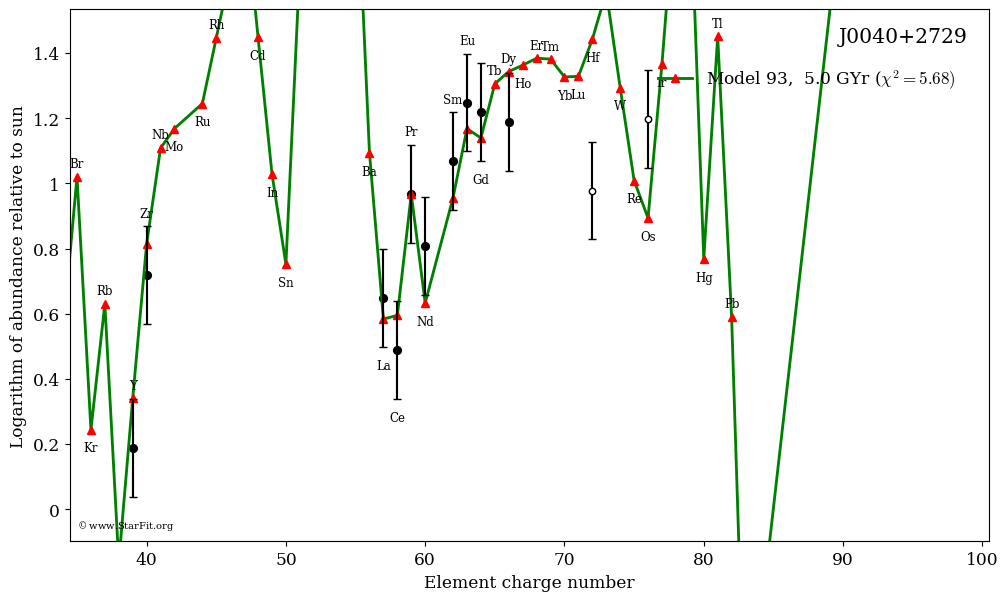

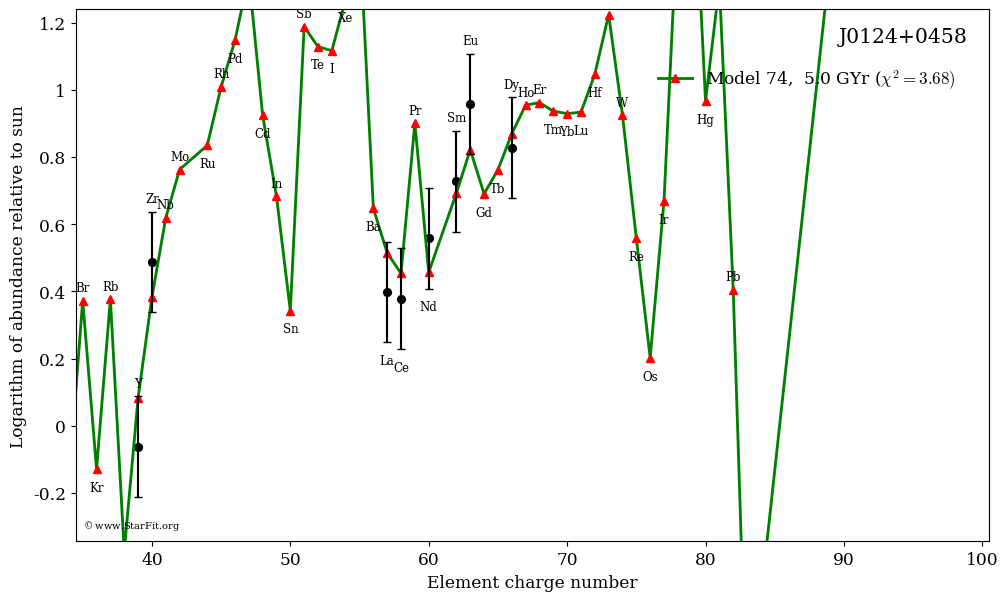

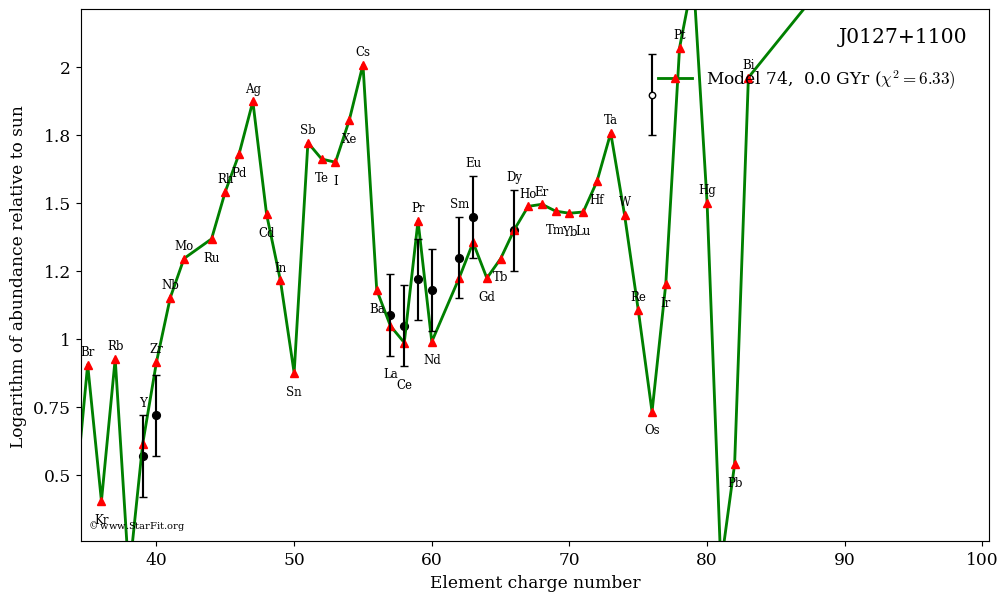

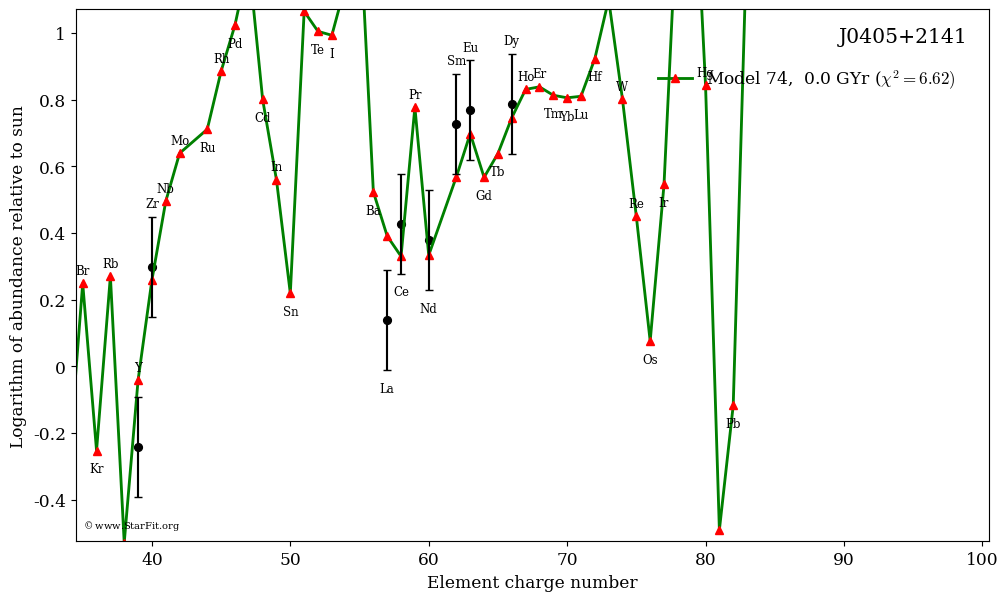

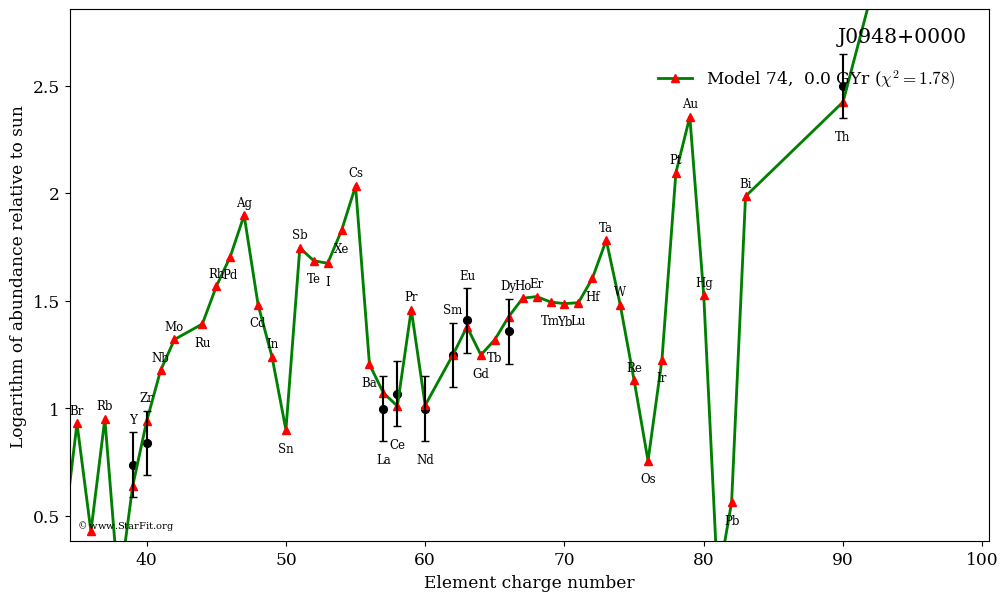

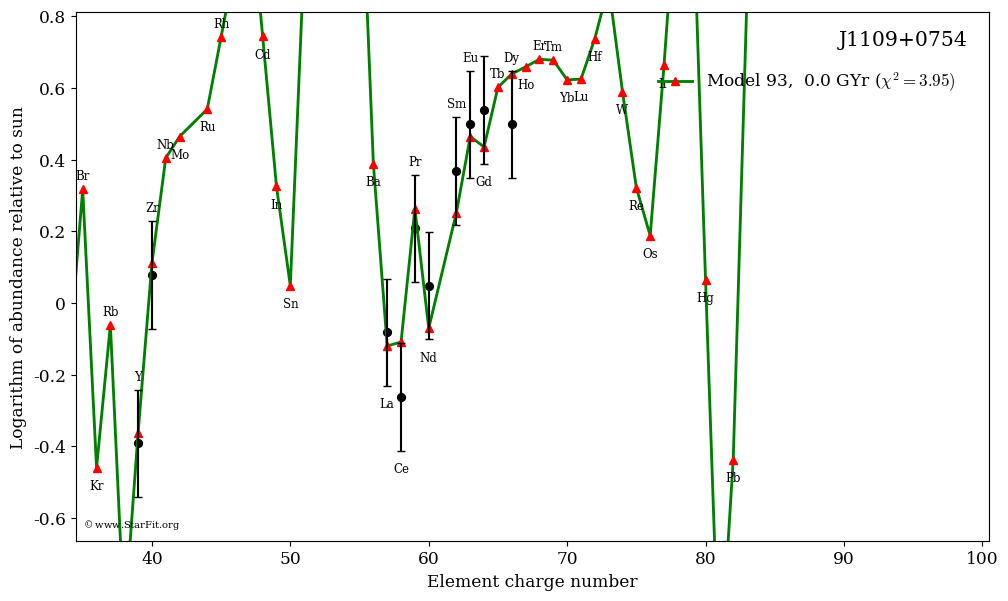

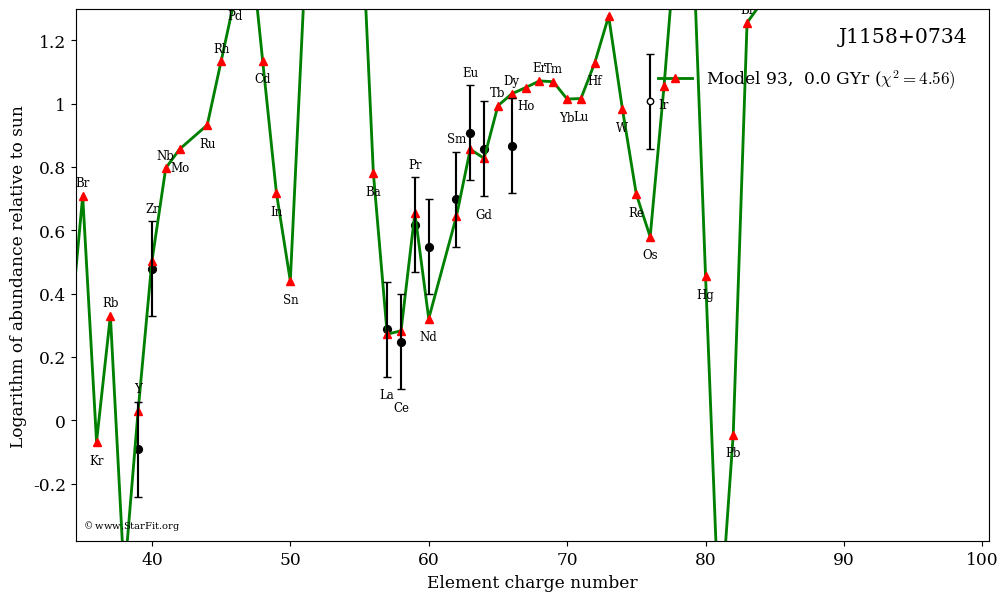

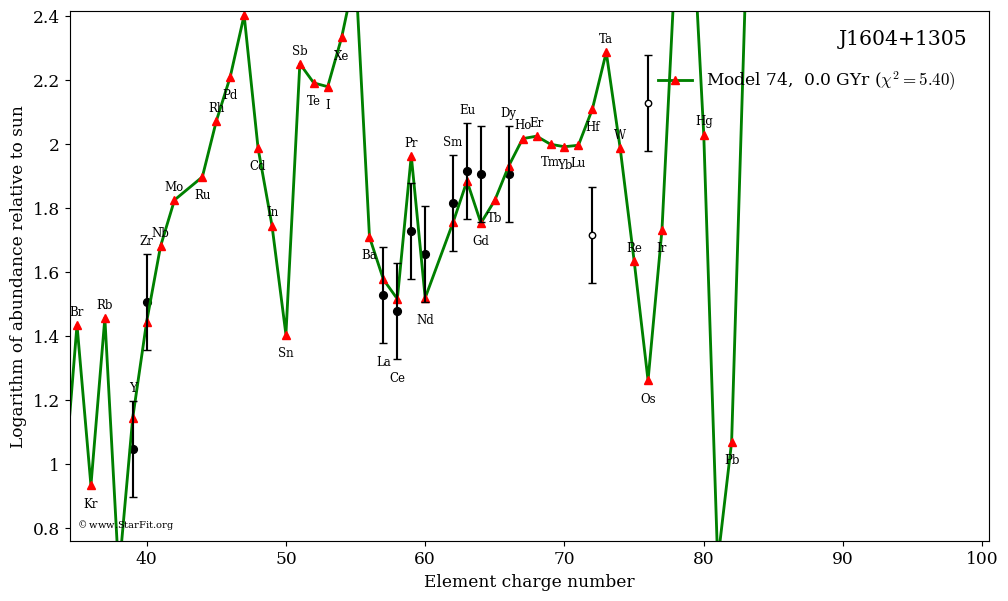

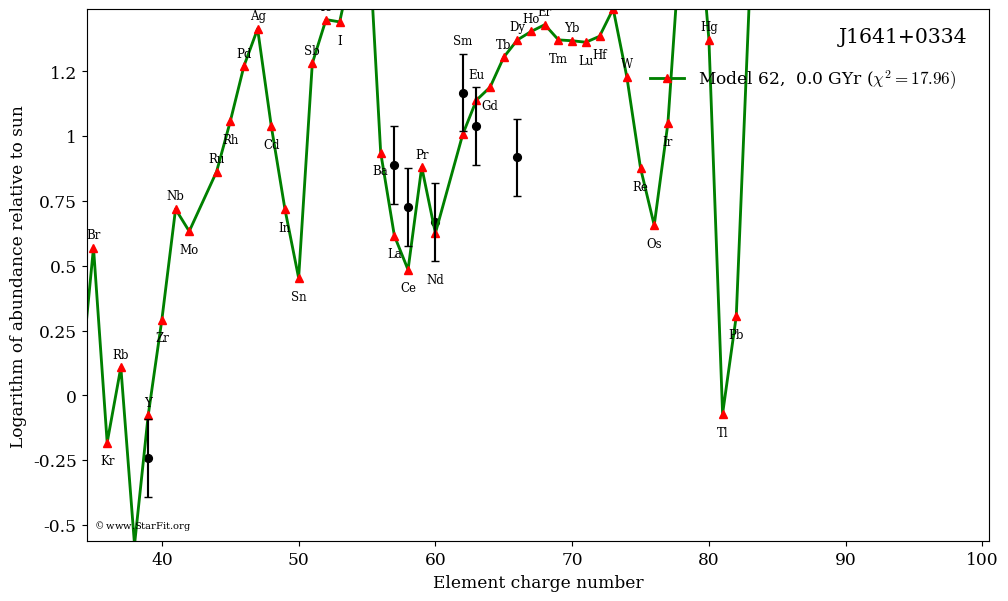

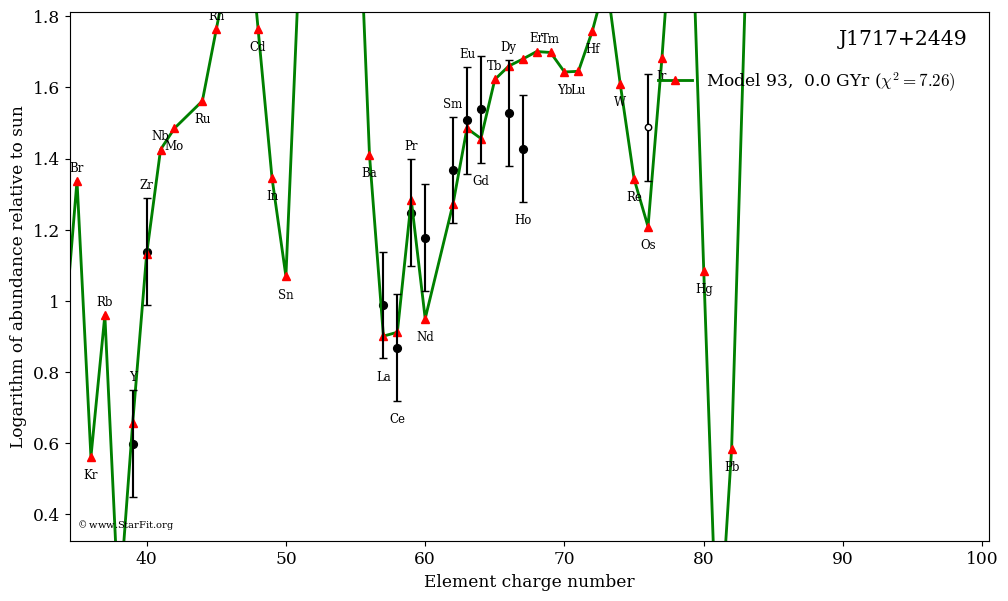

In [7]:
database = ['rproc.wu.star.el.y.stardb.xz']
for idx in range(len(df)):
    objname = df.loc[idx, 'objname'].split('.')[0]
    with open('%s.dat'%(objname), 'w') as file:
        file. write('10200\n')
        file.write('%s\n'%(objname))
        file.write('%s\n'%('Lin et al.'))
        # comment = '%s; %f'%(radec, resolution)
        # comment = '%s'%(radec)
        comment = '%.2f  %.2f'%(tuple(df.loc[idx, ['ra', 'dec']].values))
        file.write('%s\n'%(comment))
        file.write('6\n')
        file.write('\n')

        el_lines = []
        for el in element_list:
            logn_name = 'log_%s_new'%(el)
            lognerr_name = 'log_%s_new'%(el)
            if logn_name in column_names:
                logeps_el = df.loc[idx, logn_name]
                radec =  df.loc[idx, logn_name]
                if logeps_el == 9.99:
                    continue
                else:
                    el_lines.append('%-3s  %5.2f  %5.2f'%(el, logeps_el-sun.log_eps(el)+2.81, .15))
        file.write('%s\n'%(len(el_lines)))
        for el_line in el_lines:
            file.write('%s\n'%(el_line))
        file.write('As09')
    starfit.Single(
        '%s.dat'%(objname), db=database, 
        z_min=35, z_max=100, z_exclude=[72, 76], 
        silent=True
        # sol_size=1
    ).plot()